In [1]:
import os
urdf_path = os.path.join(os.getenv("HELLO_FLEET_PATH"), os.getenv("HELLO_FLEET_ID"), "exported_urdf", "stretch.urdf")
mesh_path = os.path.join(os.getenv("HELLO_FLEET_PATH"), os.getenv("HELLO_FLEET_ID"), "exported_urdf")

In [2]:
from pytransform3d.urdf import UrdfTransformManager
import pytransform3d.transformations as pt
import pytransform3d.visualizer as pv
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
tm = UrdfTransformManager()
with open(urdf_path, "r") as f:
    urdf = f.read()
    tm.load_urdf(urdf, mesh_path=mesh_path)


camera_transform = tm.get_transform('base_link', 'camera_link')

Axes3DSubplot(0.125,0.125;0.775x0.755)


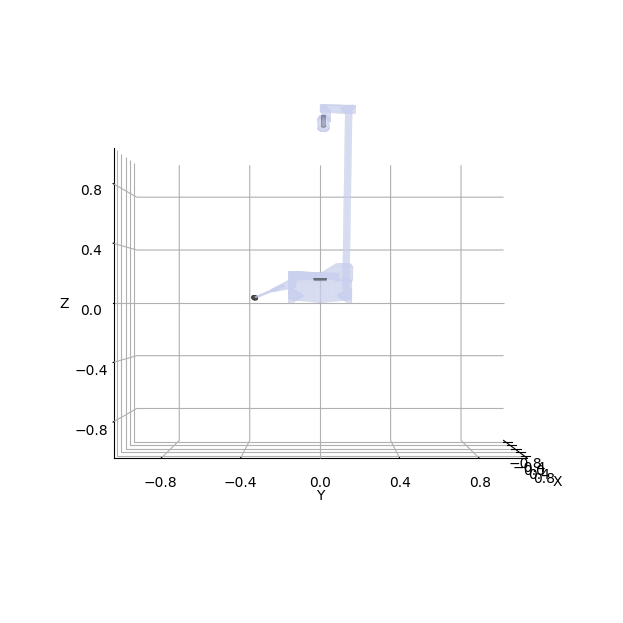

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
mp = tm.plot_visuals("base_link", ax_s=1, alpha=0.5, convex_hull_of_mesh=True)
print(mp)
mp.azim = 0
mp.elev = 0
# mp.dist = 10
plt.show()

In [7]:
tm.set_joint("joint_left_wheel", 0.5 * np.pi)
# tm.set_joint("joint_head_pan", 0.5 * np.pi / 2)
tm.set_joint("base_link", 0.5 * np.pi)

KeyError: "Joint 'base_link' is not known"

In [ ]:
mp = tm.plot_visuals("base_link", ax_s=0.1, alpha=0.5, convex_hull_of_mesh=True)
print(mp)
mp.azim = 0
mp.elev = 0
mp.dist = 100
plt.show()

In [8]:
tm.get_transform('base_link', 'camera_link')

array([[ 9.97893319e-01,  6.48650746e-02, -1.20275539e-03,
        -1.67791984e-02],
       [ 1.07329367e-03,  2.03067110e-03,  9.99997362e-01,
        -1.31301041e+00],
       [ 6.48673459e-02, -9.97891977e-01,  1.95677384e-03,
         1.46875778e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [7]:
fig = pv.figure()
fig.plot_graph(tm, "base_link", s=0.1, show_visuals=True)
fig.view_init()
fig

In [6]:
import open3d as o3d
from open3d.web_visualizer import draw
o3d.visualization.webrtc_server.enable_webrtc()

[Open3D INFO] Resetting default logger to print to terminal.
[Open3D INFO] WebRTC GUI backend enabled.


In [ ]:
draw(fig)

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
FEngine (64 bits) created at 0x7f06dc006cd0 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.
EGL(1.5)
OpenGL(4.6)


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hello-robot/droidlet/droidlet/lowlevel/hello_robot/remote/droidlet/lib/python3.8/site-packages/open3d-0.13.0-py3.8-linux-x86_64.egg/open3d/web_visualizer.py", line 145, in _thread_main
    retval = task.func()
  File "/home/hello-robot/droidlet/droidlet/lowlevel/hello_robot/remote/droidlet/lib/python3.8/site-packages/open3d-0.13.0-py3.8-linux-x86_64.egg/open3d/visualization/draw.py", line 48, in draw
    add(geometry, n)
  File "/home/hello-robot/droidlet/droidlet/lowlevel/hello_robot/remote/droidlet/lib/python3.8/site-packages/open3d-0.13.0-py3.8-linux-x86_64.egg/open3d/visualization/draw.py", line 40, in add
    w.add_geometry("Object " + str(n), g)
TypeError: add_geometry(): incompatible function arguments. The follo